In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
DATA_DIR = '../pickles'

In [3]:
df = pd.read_pickle(os.path.join(DATA_DIR, 'station1_normalized.pkl'))
df.head(10)

,date,ref,NO2_61FD,NO2_61F0,NO2_61EF,rh,t_grad,pressure,temp,pluvio
0,2017-09-28 10:15:00,38.5,-0.324687,-0.487027,0.433465,0.167023,-1.039505,0.375594,0.898638,0.0
1,2017-09-28 10:30:00,32.3,-0.343192,-0.325877,-0.412283,0.083982,-1.094050,0.375594,0.946776,0.0
2,2017-09-28 10:45:00,38.5,-0.010107,-0.161505,-0.198236,0.065528,-0.984961,0.375594,0.970844,0.0
3,2017-09-28 11:00:00,29.7,-0.386370,-0.554710,-0.339194,-0.063647,-0.984961,0.356064,1.091187,0.0
4,2017-09-28 11:15:00,19.4,-0.386370,-0.422567,-0.412283,-0.146688,-1.203138,0.375594,1.163393,0.0
5,2017-09-28 11:30:00,10.8,-0.386370,-0.619170,-0.412283,-0.238957,-1.039505,0.375594,1.259668,0.0
6,2017-09-28 11:45:00,12.4,-0.386370,-0.586940,-0.412283,-0.358905,-1.203138,0.375594,1.283736,0.0
7,2017-09-28 12:00:00,12.3,-0.386370,-0.619170,-0.412283,-0.405039,-1.148594,0.375594,1.307805,0.0
8,2017-09-28 12:15:00,9.7,-0.386370,-0.619170,-0.412283,-0.423493,-1.312227,0.356064,1.355942,0.0
9,2017-09-28 12:30:00,13.8,-0.386370,-0.619170,-0.412283,-0.552668,-1.475859,0.356064,1.548491,0.0


In [4]:
def from_dataframe_to_xy(df):
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh', 't_grad', 'pressure', 'pluvio']]),
            np.array(df['ref']))

def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

In [5]:
def lstm(nb_units, input_shape, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(nb_units, input_shape=input_shape, activation='relu'))#, recurrent_dropout=1))
    #model.add(Dense(nb_units, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    opti = Adam(lr=0.0003)
    model.compile(loss=loss, optimizer=opti)
    
    return model

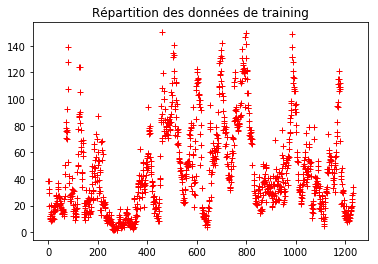

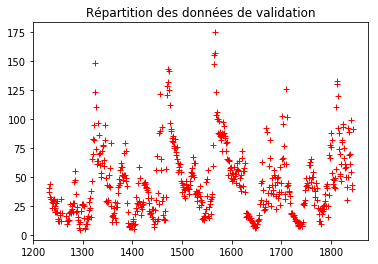

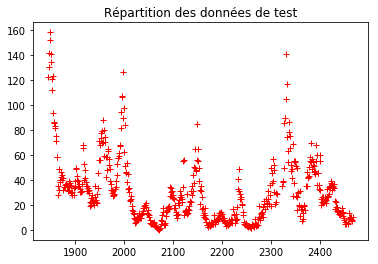

In [6]:
df_train, df_test = split_dataframe(df, 0.5)
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = from_dataframe_to_xy(df_train)
X_valid, y_valid = from_dataframe_to_xy(df_valid)
X_test, y_test = from_dataframe_to_xy(df_test)

plt.plot(df_train['ref'], '+r')
plt.title('Répartition des données de training')
plt.show()

plt.plot(df_valid['ref'], '+r')
plt.title('Répartition des données de validation')
plt.show()

plt.plot(df_test['ref'], '+r')
plt.title('Répartition des données de test')
plt.show()

In [7]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid= X_valid.reshape((X_valid.shape[0], 1,  X_valid.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [8]:
model = lstm(32, X_train.shape[1:])
early_stopping = EarlyStopping(patience=10)
history = model.fit(X_train, y_train, \
                    batch_size=32, \
                    epochs=1000, \
                    validation_data=(X_valid, y_valid), \
                    callbacks=[early_stopping])

Train on 1206 samples, validate on 603 samples
Epoch 1/1000
1206/1206 [==============================] - 1s 832us/step - loss: 3218.9710 - val_loss: 2810.5354
Epoch 2/1000
1206/1206 [==============================] - 0s 81us/step - loss: 3215.3254 - val_loss: 2807.5325
Epoch 3/1000
1206/1206 [==============================] - 0s 77us/step - loss: 3210.8091 - val_loss: 2803.7338
Epoch 4/1000
1206/1206 [==============================] - 0s 78us/step - loss: 3204.8634 - val_loss: 2798.7038
Epoch 5/1000
1206/1206 [==============================] - 0s 75us/step - loss: 3196.9989 - val_loss: 2792.3354
Epoch 6/1000
1206/1206 [==============================] - 0s 73us/step - loss: 3187.1037 - val_loss: 2784.1272
Epoch 7/1000
1206/1206 [==============================] - 0s 81us/step - loss: 3174.6728 - val_loss: 2774.3132
Epoch 8/1000
1206/1206 [==============================] - 0s 79us/step - loss: 3160.2059 - val_loss: 2762.6693
Epoch 9/1000
1206/1206 [==============================] - 0s 81u

Epoch 74/1000
1206/1206 [==============================] - 0s 73us/step - loss: 1697.1359 - val_loss: 1594.1631
Epoch 75/1000
1206/1206 [==============================] - 0s 72us/step - loss: 1678.4218 - val_loss: 1577.5905
Epoch 76/1000
1206/1206 [==============================] - 0s 72us/step - loss: 1659.9468 - val_loss: 1560.8844
Epoch 77/1000
1206/1206 [==============================] - 0s 73us/step - loss: 1641.6160 - val_loss: 1544.3660
Epoch 78/1000
1206/1206 [==============================] - 0s 72us/step - loss: 1623.6759 - val_loss: 1528.7112
Epoch 79/1000
1206/1206 [==============================] - 0s 72us/step - loss: 1606.0082 - val_loss: 1512.7298
Epoch 80/1000
1206/1206 [==============================] - 0s 72us/step - loss: 1588.4569 - val_loss: 1497.4033
Epoch 81/1000
1206/1206 [==============================] - 0s 73us/step - loss: 1571.2643 - val_loss: 1482.2349
Epoch 82/1000
1206/1206 [==============================] - 0s 76us/step - loss: 1554.3672 - val_loss: 14

1206/1206 [==============================] - 0s 73us/step - loss: 863.2128 - val_loss: 793.6208
Epoch 148/1000
1206/1206 [==============================] - 0s 71us/step - loss: 856.1785 - val_loss: 786.7147
Epoch 149/1000
1206/1206 [==============================] - 0s 71us/step - loss: 849.2512 - val_loss: 779.7220
Epoch 150/1000
1206/1206 [==============================] - 0s 76us/step - loss: 842.2562 - val_loss: 773.1797
Epoch 151/1000
1206/1206 [==============================] - 0s 76us/step - loss: 835.4194 - val_loss: 767.4999
Epoch 152/1000
1206/1206 [==============================] - 0s 76us/step - loss: 828.5008 - val_loss: 760.6893
Epoch 153/1000
1206/1206 [==============================] - 0s 71us/step - loss: 821.6945 - val_loss: 754.2255
Epoch 154/1000
1206/1206 [==============================] - 0s 72us/step - loss: 814.9614 - val_loss: 747.4884
Epoch 155/1000
1206/1206 [==============================] - 0s 73us/step - loss: 808.2700 - val_loss: 741.0874
Epoch 156/1000
1

Epoch 221/1000
1206/1206 [==============================] - 0s 74us/step - loss: 444.3803 - val_loss: 384.5943
Epoch 222/1000
1206/1206 [==============================] - 0s 75us/step - loss: 440.1882 - val_loss: 380.3498
Epoch 223/1000
1206/1206 [==============================] - 0s 73us/step - loss: 436.0894 - val_loss: 376.2806
Epoch 224/1000
1206/1206 [==============================] - 0s 72us/step - loss: 432.0144 - val_loss: 371.9090
Epoch 225/1000
1206/1206 [==============================] - 0s 74us/step - loss: 427.9585 - val_loss: 368.4698
Epoch 226/1000
1206/1206 [==============================] - 0s 73us/step - loss: 424.0269 - val_loss: 364.4281
Epoch 227/1000
1206/1206 [==============================] - 0s 72us/step - loss: 420.0456 - val_loss: 360.8188
Epoch 228/1000
1206/1206 [==============================] - 0s 74us/step - loss: 416.1932 - val_loss: 356.7832
Epoch 229/1000
1206/1206 [==============================] - 0s 75us/step - loss: 412.3339 - val_loss: 353.0207
E

Epoch 295/1000
1206/1206 [==============================] - 0s 74us/step - loss: 240.3811 - val_loss: 200.7238
Epoch 296/1000
1206/1206 [==============================] - 0s 70us/step - loss: 238.6620 - val_loss: 199.3089
Epoch 297/1000
1206/1206 [==============================] - 0s 71us/step - loss: 236.9065 - val_loss: 197.9953
Epoch 298/1000
1206/1206 [==============================] - 0s 73us/step - loss: 235.1964 - val_loss: 196.7729
Epoch 299/1000
1206/1206 [==============================] - 0s 73us/step - loss: 233.5157 - val_loss: 195.4563
Epoch 300/1000
1206/1206 [==============================] - 0s 72us/step - loss: 231.8195 - val_loss: 194.1208
Epoch 301/1000
1206/1206 [==============================] - 0s 71us/step - loss: 230.1748 - val_loss: 193.0325
Epoch 302/1000
1206/1206 [==============================] - 0s 75us/step - loss: 228.5158 - val_loss: 191.6530
Epoch 303/1000
1206/1206 [==============================] - 0s 75us/step - loss: 226.8835 - val_loss: 190.4421
E

Epoch 369/1000
1206/1206 [==============================] - 0s 76us/step - loss: 144.2981 - val_loss: 132.5239
Epoch 370/1000
1206/1206 [==============================] - 0s 76us/step - loss: 143.2800 - val_loss: 131.8310
Epoch 371/1000
1206/1206 [==============================] - 0s 76us/step - loss: 142.2908 - val_loss: 131.2410
Epoch 372/1000
1206/1206 [==============================] - 0s 78us/step - loss: 141.2782 - val_loss: 130.5970
Epoch 373/1000
1206/1206 [==============================] - 0s 88us/step - loss: 140.3316 - val_loss: 129.9803
Epoch 374/1000
1206/1206 [==============================] - ETA: 0s - loss: 143.214 - 0s 77us/step - loss: 139.3524 - val_loss: 129.4147
Epoch 375/1000
1206/1206 [==============================] - 0s 76us/step - loss: 138.3971 - val_loss: 128.7325
Epoch 376/1000
1206/1206 [==============================] - 0s 73us/step - loss: 137.4038 - val_loss: 128.0857
Epoch 377/1000
1206/1206 [==============================] - 0s 80us/step - loss: 136.3

1206/1206 [==============================] - 0s 75us/step - loss: 88.6419 - val_loss: 95.3830
Epoch 443/1000
1206/1206 [==============================] - 0s 72us/step - loss: 88.1052 - val_loss: 95.0101
Epoch 444/1000
1206/1206 [==============================] - 0s 69us/step - loss: 87.5716 - val_loss: 94.7032
Epoch 445/1000
1206/1206 [==============================] - 0s 72us/step - loss: 87.0706 - val_loss: 94.2679
Epoch 446/1000
1206/1206 [==============================] - 0s 70us/step - loss: 86.6027 - val_loss: 93.9186
Epoch 447/1000
1206/1206 [==============================] - 0s 73us/step - loss: 86.1154 - val_loss: 93.8174
Epoch 448/1000
1206/1206 [==============================] - 0s 76us/step - loss: 85.6906 - val_loss: 93.3104
Epoch 449/1000
1206/1206 [==============================] - 0s 79us/step - loss: 85.1514 - val_loss: 92.8731
Epoch 450/1000
1206/1206 [==============================] - 0s 76us/step - loss: 84.7644 - val_loss: 92.5056
Epoch 451/1000
1206/1206 [========

1206/1206 [==============================] - 0s 71us/step - loss: 63.2298 - val_loss: 76.1524
Epoch 518/1000
1206/1206 [==============================] - 0s 69us/step - loss: 63.0410 - val_loss: 75.9671
Epoch 519/1000
1206/1206 [==============================] - 0s 71us/step - loss: 62.8077 - val_loss: 75.7110
Epoch 520/1000
1206/1206 [==============================] - 0s 69us/step - loss: 62.6400 - val_loss: 75.5760
Epoch 521/1000
1206/1206 [==============================] - 0s 70us/step - loss: 62.4283 - val_loss: 75.5014
Epoch 522/1000
1206/1206 [==============================] - 0s 69us/step - loss: 62.1959 - val_loss: 75.3310
Epoch 523/1000
1206/1206 [==============================] - 0s 71us/step - loss: 62.0311 - val_loss: 75.3376
Epoch 524/1000
1206/1206 [==============================] - 0s 76us/step - loss: 61.8029 - val_loss: 74.9406
Epoch 525/1000
1206/1206 [==============================] - 0s 74us/step - loss: 61.6150 - val_loss: 74.8985
Epoch 526/1000
1206/1206 [========

1206/1206 [==============================] - 0s 76us/step - loss: 53.0922 - val_loss: 68.7361
Epoch 593/1000
1206/1206 [==============================] - 0s 72us/step - loss: 53.0333 - val_loss: 68.7460
Epoch 594/1000
1206/1206 [==============================] - 0s 69us/step - loss: 52.9628 - val_loss: 68.6555
Epoch 595/1000
1206/1206 [==============================] - 0s 72us/step - loss: 52.8393 - val_loss: 68.5797
Epoch 596/1000
1206/1206 [==============================] - 0s 71us/step - loss: 52.7799 - val_loss: 68.3842
Epoch 597/1000
1206/1206 [==============================] - 0s 74us/step - loss: 52.6997 - val_loss: 68.5633
Epoch 598/1000
1206/1206 [==============================] - 0s 75us/step - loss: 52.5962 - val_loss: 68.3957
Epoch 599/1000
1206/1206 [==============================] - 0s 79us/step - loss: 52.5678 - val_loss: 68.3258
Epoch 600/1000
1206/1206 [==============================] - 0s 84us/step - loss: 52.4567 - val_loss: 68.4734
Epoch 601/1000
1206/1206 [========

1206/1206 [==============================] - 0s 70us/step - loss: 48.4886 - val_loss: 66.3990
Epoch 668/1000
1206/1206 [==============================] - 0s 77us/step - loss: 48.4381 - val_loss: 66.3140
Epoch 669/1000
1206/1206 [==============================] - 0s 81us/step - loss: 48.3734 - val_loss: 66.2661
Epoch 670/1000
1206/1206 [==============================] - 0s 76us/step - loss: 48.3342 - val_loss: 66.2882
Epoch 671/1000
1206/1206 [==============================] - 0s 77us/step - loss: 48.3024 - val_loss: 66.2498
Epoch 672/1000
1206/1206 [==============================] - 0s 102us/step - loss: 48.2631 - val_loss: 66.3082
Epoch 673/1000
1206/1206 [==============================] - 0s 76us/step - loss: 48.2368 - val_loss: 66.2350
Epoch 674/1000
1206/1206 [==============================] - 0s 89us/step - loss: 48.1676 - val_loss: 66.2768
Epoch 675/1000
1206/1206 [==============================] - 0s 93us/step - loss: 48.1158 - val_loss: 66.2416
Epoch 676/1000
1206/1206 [=======

1206/1206 [==============================] - 0s 72us/step - loss: 45.6861 - val_loss: 65.5314


In [9]:
model.evaluate(X_test, y_test, verbose=0)

299.27655534554793

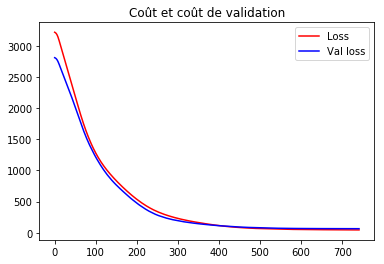

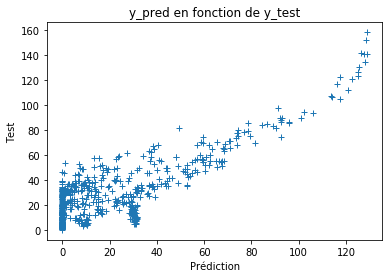

In [10]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()

In [11]:
def lstm_plus_dense(nb_units, input_shape, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(nb_units, input_shape=input_shape, activation='relu'))#, recurrent_dropout=1))
    model.add(Dense(nb_units, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    opti = Adam(lr=0.0003)
    model.compile(loss=loss, optimizer=opti)
    
    return model

In [12]:
model = lstm_plus_dense(32, X_train.shape[1:])
history = model.fit(X_train, y_train, \
                    batch_size=32, \
                    epochs=1000, \
                    validation_data=(X_valid, y_valid), \
                    callbacks=[early_stopping])

Train on 1206 samples, validate on 603 samples
Epoch 1/1000
1206/1206 [==============================] - 1s 867us/step - loss: 3219.6919 - val_loss: 2811.3699
Epoch 2/1000
1206/1206 [==============================] - 0s 73us/step - loss: 3215.7180 - val_loss: 2805.9924
Epoch 3/1000
1206/1206 [==============================] - 0s 79us/step - loss: 3208.1846 - val_loss: 2798.0608
Epoch 4/1000
1206/1206 [==============================] - 0s 76us/step - loss: 3195.3137 - val_loss: 2784.4559
Epoch 5/1000
1206/1206 [==============================] - 0s 75us/step - loss: 3172.0119 - val_loss: 2761.0656
Epoch 6/1000
1206/1206 [==============================] - 0s 77us/step - loss: 3132.7753 - val_loss: 2723.9653
Epoch 7/1000
1206/1206 [==============================] - 0s 73us/step - loss: 3071.3113 - val_loss: 2668.7146
Epoch 8/1000
1206/1206 [==============================] - 0s 73us/step - loss: 2982.2405 - val_loss: 2588.5663
Epoch 9/1000
1206/1206 [==============================] - 0s 80u

Epoch 75/1000
1206/1206 [==============================] - 0s 76us/step - loss: 94.2680 - val_loss: 154.4602
Epoch 76/1000
1206/1206 [==============================] - 0s 78us/step - loss: 92.9985 - val_loss: 152.2735
Epoch 77/1000
1206/1206 [==============================] - 0s 80us/step - loss: 91.8709 - val_loss: 149.9582
Epoch 78/1000
1206/1206 [==============================] - 0s 78us/step - loss: 90.7224 - val_loss: 145.3734
Epoch 79/1000
1206/1206 [==============================] - 0s 91us/step - loss: 89.5950 - val_loss: 142.7913
Epoch 80/1000
1206/1206 [==============================] - 0s 78us/step - loss: 88.5270 - val_loss: 140.4903
Epoch 81/1000
1206/1206 [==============================] - 0s 77us/step - loss: 87.5807 - val_loss: 138.1921
Epoch 82/1000
1206/1206 [==============================] - 0s 79us/step - loss: 86.5890 - val_loss: 135.5348
Epoch 83/1000
1206/1206 [==============================] - 0s 81us/step - loss: 85.6271 - val_loss: 132.9492
Epoch 84/1000
1206/

1206/1206 [==============================] - 0s 78us/step - loss: 57.9482 - val_loss: 72.5781
Epoch 151/1000
1206/1206 [==============================] - 0s 76us/step - loss: 57.7604 - val_loss: 72.2973
Epoch 152/1000
1206/1206 [==============================] - 0s 74us/step - loss: 57.5720 - val_loss: 72.6677
Epoch 153/1000
1206/1206 [==============================] - 0s 78us/step - loss: 57.4284 - val_loss: 72.0057
Epoch 154/1000
1206/1206 [==============================] - 0s 77us/step - loss: 57.2416 - val_loss: 72.1875
Epoch 155/1000
1206/1206 [==============================] - 0s 78us/step - loss: 57.1151 - val_loss: 72.0393
Epoch 156/1000
1206/1206 [==============================] - 0s 77us/step - loss: 56.9496 - val_loss: 72.1408
Epoch 157/1000
1206/1206 [==============================] - 0s 90us/step - loss: 56.7987 - val_loss: 72.3404
Epoch 158/1000
1206/1206 [==============================] - 0s 87us/step - loss: 56.7096 - val_loss: 71.9647
Epoch 159/1000
1206/1206 [========

In [13]:
model.evaluate(X_test, y_test, verbose=0)

197.55055752179481

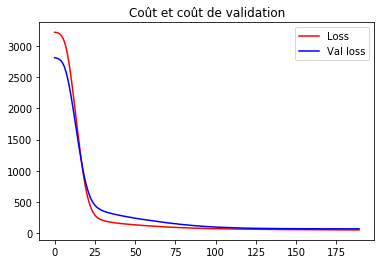

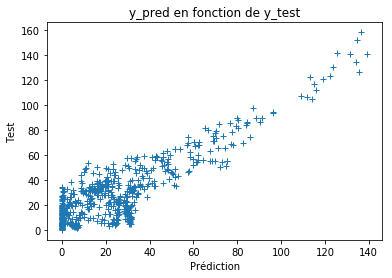

In [14]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()